In [2]:
#importo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
#caricare correttamente il dataset CIFAR10;
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
extract_path = 'D:\\DatasetCifar\\cifar-10-python'
pickle_file_1 = os.path.join(extract_path, 'cifar-10-batches-py', 'data_batch_1')
data_batch_1 = unpickle(pickle_file_1)
pickle_file_2 = os.path.join(extract_path, 'cifar-10-batches-py', 'data_batch_2')
data_batch_2 = unpickle(pickle_file_2)
pickle_file_3 = os.path.join(extract_path, 'cifar-10-batches-py', 'data_batch_3')
data_batch_3 = unpickle(pickle_file_3)
pickle_file_4 = os.path.join(extract_path, 'cifar-10-batches-py', 'data_batch_4')
data_batch_4 = unpickle(pickle_file_4)
pickle_file_5 = os.path.join(extract_path, 'cifar-10-batches-py', 'data_batch_5')
data_batch_5 = unpickle(pickle_file_5)
# test_batch
pickle_file_test = os.path.join(extract_path, 'cifar-10-batches-py', 'test_batch')
test_batch = unpickle(pickle_file_test)

In [4]:
#controllo le key
for key in test_batch.keys():
    print(f"Key: {key}, Type: {type(test_batch[key])}")

Key: b'batch_label', Type: <class 'bytes'>
Key: b'labels', Type: <class 'list'>
Key: b'data', Type: <class 'numpy.ndarray'>
Key: b'filenames', Type: <class 'list'>


In [87]:
print("Classi:", classes)

Classi: [0 1 2 3 4 5 6 7 8 9]


In [5]:
print("labels: 10000 numbers in the range 0-9: ",len(test_batch[b'labels']) ,
       "\ndata a 10000x3072 numpy array of uint8s: ", test_batch[b'data'].shape)  

labels: 10000 numbers in the range 0-9:  10000 
data a 10000x3072 numpy array of uint8s:  (10000, 3072)


In [6]:
#sistemo il dataset
X = np.concatenate([data_batch_1[b'data'], data_batch_2[b'data'], data_batch_3[b'data'],
                              data_batch_4[b'data'], data_batch_5[b'data'],test_batch[b'data']])
y = np.concatenate([data_batch_1[b'labels'], data_batch_2[b'labels'], data_batch_3[b'labels'],
                                 data_batch_4[b'labels'], data_batch_5[b'labels'],test_batch[b'labels']])
# mi assicuro che le dimensioni siano corrette, 
# mi aspetto 60000 immagini 3072 e 60000 labels
print(X.shape, y.shape)

(60000, 3072) (60000,)


In [7]:
#dal sito fornito viene richiesto un train set di 50000 immagini
X_train = X[:50000]
y_train = y[:50000]
#il test sei è composto da 10000 immagini e 10000 labels
#per effettuare una corretta model selection, divido il test set 
#in un validation set e un test set
X_temp = X[50000:]
y_temp = y[50000:]
# Shuffle
X_temp, y_temp = shuffle(X_temp, y_temp, random_state=42)
# Split 5.000 validation + 5.000 test
X_val = X_temp[:5000]
y_val = y_temp[:5000]
X_test = X_temp[5000:]
y_test = y_temp[5000:]
# mi aspetto che il train sia 50000, test 5000 e val 5000
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (50000, 3072) (50000,)
Validation: (5000, 3072) (5000,)
Test: (5000, 3072) (5000,)


In [13]:
# il dataset era troppo grnade per fare il calcolo, ho trovato la libreria sklearn.utils.resample 
# che permette di sotto-campionare il dataset
X_train_small, y_train_small = resample(
    X_train, y_train, 
    n_samples=500,
    random_state=42,
    replace=False
)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_small)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

In [14]:
#regressione logistica
# Modello
model = LogisticRegression(max_iter=50, solver='liblinear', C=1.0)
model.fit(X_train_normalized, y_train_small)
prediction_test = model.predict(X_test_normalized)
prediction_validation = model.predict(X_val_normalized)
reportClassificatoreTest = classification_report(y_test, prediction_test)
reportClassificatoreValidation = classification_report(y_val, prediction_validation)
print(reportClassificatoreTest,reportClassificatoreValidation)

              precision    recall  f1-score   support

           0       0.32      0.29      0.31       521
           1       0.31      0.23      0.26       514
           2       0.17      0.18      0.18       475
           3       0.16      0.20      0.18       500
           4       0.19      0.25      0.21       494
           5       0.21      0.19      0.20       522
           6       0.21      0.17      0.19       489
           7       0.20      0.19      0.20       472
           8       0.28      0.39      0.33       511
           9       0.29      0.21      0.24       502

    accuracy                           0.23      5000
   macro avg       0.23      0.23      0.23      5000
weighted avg       0.24      0.23      0.23      5000
               precision    recall  f1-score   support

           0       0.27      0.27      0.27       479
           1       0.28      0.22      0.24       486
           2       0.16      0.14      0.15       525
           3       0.14 

In [15]:
#k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_normalized, y_train_small)

KNeighborsClassifier()

In [18]:
def plot_decision_boundary(knn_model, X_train, y_train):
    h = 0.1  
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    unique_classes = np.unique(y_train)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)  
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', 
                          label='Training set', cmap=plt.cm.RdYlBu, s=20)  
    plt.title(f'Confini Decisionali di K-Nearest Neighbors')
    plt.legend(scatter.legend_elements()[0], unique_classes, title='Classi')
    plt.show()

In [19]:
#notiamo che anche con l'uso della della PCA il modell k-NN non riesce a separare le classi in modo ottimale
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced_scaled = scaler.fit_transform(X_reduced)
knn_reduced = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn_reduced.fit(X_reduced_scaled, y)
plot_decision_boundary(knn_reduced, X_reduced_scaled, y)

MemoryError: Unable to allocate 1.37 GiB for an array with shape (60000, 3072) and data type float64

In [ ]:
#SVC
modelSVC = SVC(kernel='linear', C=0.01)
modelSVC.fit(X_train_normalized, y_train_small)
prediction_testSVC = modelSVC.predict(X_test_normalized)
prediction_validationSVC = modelSVC.predict(X_val_normalized)
reportClassificatoreTestSVC = classification_report(y_test, prediction_testSVC)
reportClassificatoreValidationSVC = classification_report(y_val, prediction_validationSVC)

              precision    recall  f1-score   support

           0       0.39      0.43      0.41       521
           1       0.36      0.32      0.34       514
           2       0.17      0.20      0.19       475
           3       0.21      0.29      0.24       500
           4       0.21      0.28      0.24       494
           5       0.28      0.20      0.23       522
           6       0.26      0.21      0.23       489
           7       0.26      0.19      0.22       472
           8       0.41      0.48      0.44       511
           9       0.38      0.30      0.33       502

    accuracy                           0.29      5000
   macro avg       0.29      0.29      0.29      5000
weighted avg       0.30      0.29      0.29      5000
               precision    recall  f1-score   support

           0       0.32      0.37      0.35       479
           1       0.34      0.29      0.31       486
           2       0.18      0.20      0.19       525
           3       0.17 

In [ ]:
#essendo i report classificatori molto simili tra SVC e Logistic Regression, controllo se le predizioni sono uguali 
prediction_validationLogistic = model.predict(X_val_normalized)  
print("Predizioni uguali su validation:",
      (prediction_validationSVC == prediction_validationLogistic).mean())

Predizioni uguali su validation: 0.4116


In [11]:
#DecisionTree
from sklearn.metrics import accuracy_score, confusion_matrix
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
# Step 2 - Alleniamo il modello
# Allena il modello utilizzando i dati di addestramento
tree_model.fit(X_train_normalized, y_train_small)
# Step 3 - Calcoliamo le predizioni
# Calcola le predizioni sul test set
tree_predictions = tree_model.predict(X_test_normalized)
# Step 4 - Valutiamo il modello, calcoliamo accuracy e confusion matrix
# Calcola l'accuratezza
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'Accuracy (Decision Tree): {tree_accuracy:.2f}')
# Calcola la matrice di confusione
tree_confusion_matrix = confusion_matrix(y_test, tree_predictions)
print(f'Matrice di Confusione (Decision Tree):\n{tree_confusion_matrix}')

Accuracy (Decision Tree): 0.22
Matrice di Confusione (Decision Tree):
[[131  51  11  14  46  19  30  41 138  40]
 [ 56 109  20  14  55  24  77  19  55  85]
 [ 38  37   6  36 126  30  96  34  41  31]
 [ 28  28   9  54  97  50 117  30  40  47]
 [ 26  27   3  37 170  36 134  19  23  19]
 [ 30  49   9  64 104  89  80  32  36  29]
 [ 21  48   9  45  96  44 158  29  15  24]
 [ 47  30   9  29  93  37  65  66  47  49]
 [ 58  50  15  19  33  10  32  18 196  80]
 [102  52   8  10  38  13  45  31  72 131]]


In [12]:
# Visualizzazione dell'albero creato
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=None, class_names=label_names, 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree - Class Labels: ' + ', '.join(label_names))
plt.show()

NameError: name 'label_names' is not defined

<Figure size 2000x1000 with 0 Axes>

In [93]:
model_results = {
    "Logistic Regression": {
        "Test Accuracy": (prediction_test == y_test).mean(),
        "Validation Accuracy": (prediction_validation == y_val).mean(),
        "Test Report": reportClassificatoreTest,
        "Validation Report": reportClassificatoreValidation
    },
    "SVC": {
        "Test Accuracy": (prediction_testSVC == y_test).mean(),
        "Validation Accuracy": (prediction_validationSVC == y_val).mean(),
        "Test Report": reportClassificatoreTestSVC,
        "Validation Report": reportClassificatoreValidationSVC
    },
    "Decision Tree": {
        "Test Accuracy": (prediction_testTree == y_test).mean(),
        "Validation Accuracy": (prediction_validationTree == y_val).mean(),
        "Test Report": reportClassificatoreTestTree,
        "Validation Report": reportClassificatoreValidationTree
    },
    "k-NN": {
        "Test Accuracy": knn_model.score(X_test_normalized, y_test),
        "Validation Accuracy": knn_model.score(X_val_normalized, y_val)
    }
}
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {results['Test Accuracy']:.4f}")
    print(f"Validation Accuracy: {results['Validation Accuracy']:.4f}")
    if "Test Report" in results:
        print("Test Report:")
        print(results["Test Report"])
        print("Validation Report:")
        print(results["Validation Report"])
    print("-" * 50)

Model: Logistic Regression
Test Accuracy: 0.2306
Validation Accuracy: 0.2112
Test Report:
              precision    recall  f1-score   support

           0       0.32      0.29      0.31       521
           1       0.31      0.23      0.26       514
           2       0.17      0.18      0.18       475
           3       0.16      0.20      0.18       500
           4       0.19      0.25      0.21       494
           5       0.21      0.19      0.20       522
           6       0.21      0.17      0.19       489
           7       0.20      0.19      0.20       472
           8       0.28      0.39      0.33       511
           9       0.29      0.21      0.24       502

    accuracy                           0.23      5000
   macro avg       0.23      0.23      0.23      5000
weighted avg       0.24      0.23      0.23      5000

Validation Report:
              precision    recall  f1-score   support

           0       0.27      0.27      0.27       479
           1       0.28

In [ ]:
#da una stima iniziale il modello migliore sembra essere il SVC, seguito dalla regressione 
#logistica e infine dal k-NN, il decision tree sembra essere il peggiore
#overfitta, vediamo se riesco a migliorarlo

In [ ]:
# Albero ottimizzato con parametri più controllati
# Istanziamo il nuovo albero specificando tutti i parametri di cui abbiamo bisogno.
dt_2nd = DecisionTreeClassifier(criterion='entropy', 
                                max_depth=3, 
                                min_samples_split=5, 
                                min_samples_leaf=2, 
                                random_state=42)
# Alleniamo l'albero
dt_2nd.fit(X_train, y_train)
# Effettuare le predizioni del nuovo albero allenato
predictions_2nd = dt_2nd.predict(X_test)
# Rappresentiamo il nuovo albero
plt.figure(figsize=(15, 8))
plot_tree(dt_2nd, feature_names=feature_names, class_names=target_names, 
          filled=True, rounded=True, fontsize=10)
plt.title('Albero Decisionale Ottimizzato')
plt.show()

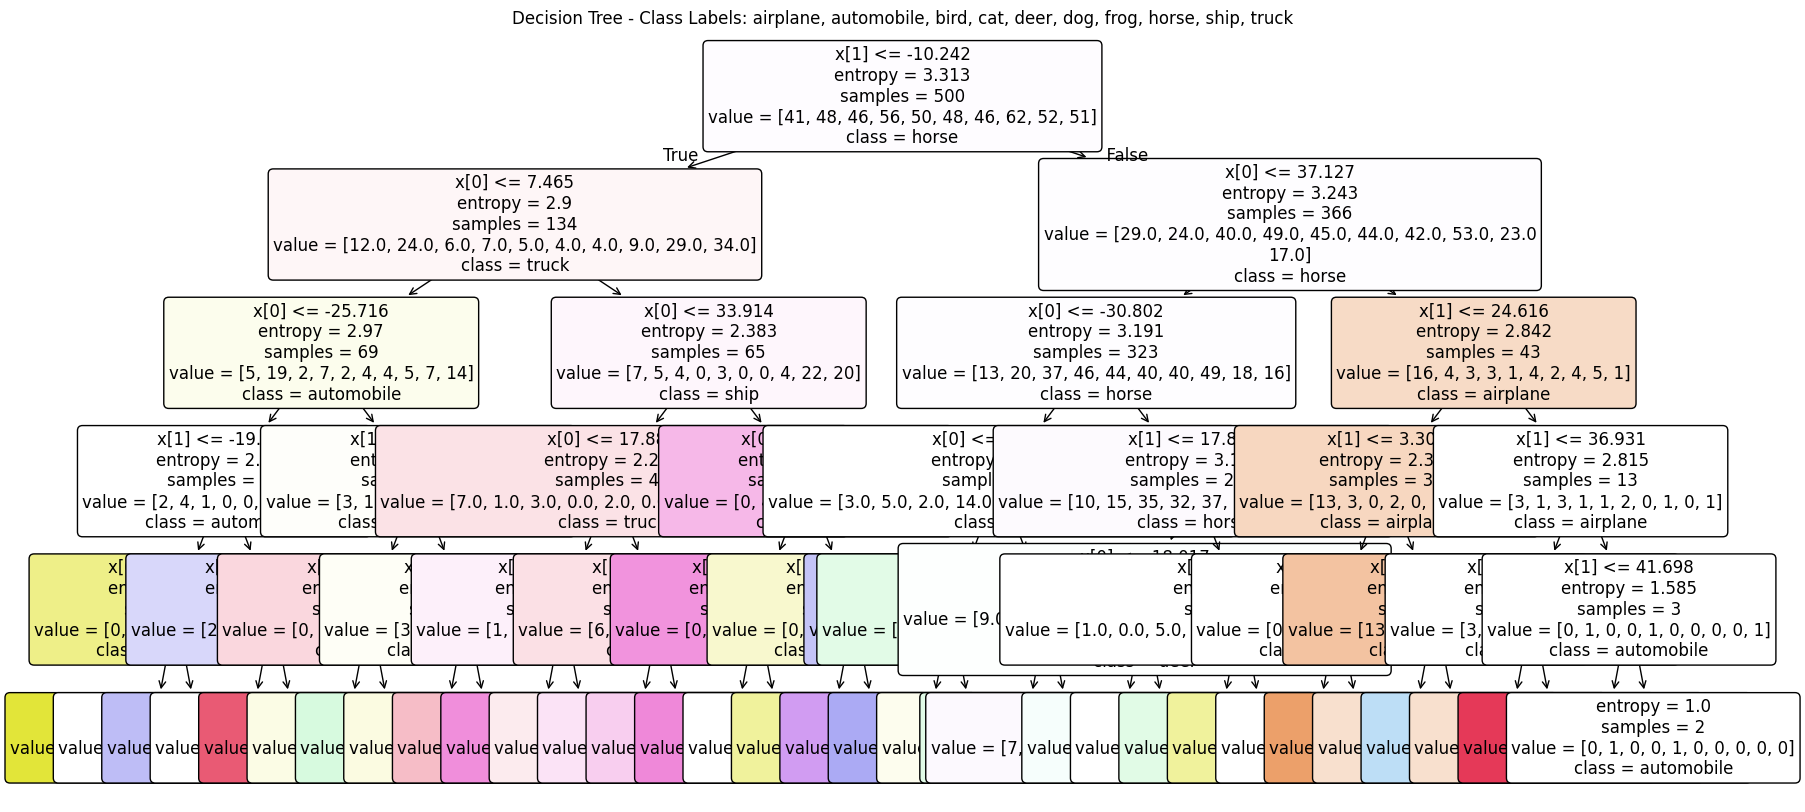

In [95]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model_pca, feature_names=None, class_names=label_names, 
          filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree - Class Labels: ' + ', '.join(label_names))
plt.show()